In [48]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import seaborn as sns
from toolbox import plot_tools
import corner
import scipy

sns.set_style('ticks')

In [55]:
halpha_input = Table.read('C:/Users/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
halpha_full_pdf = Table.read('C:/Users/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_full_PDFs.fits')

halpha_ssps = Table.read('C:/Users/ariel/Workspace/GASP/HST/Archive/11_01_2023_restart/Data/tail_halpha_ssp_bagpipes_results.fits')
halpha_ssps_input = Table.read('C:/Users/ariel/Workspace/GASP/HST/Archive/11_01_2023_restart/Data/tail_halpha_bagpipes_input.fits')

ssps_flag = halpha_ssps_input['sel_flag'] == 31

halpha_ssps = halpha_ssps[ssps_flag]
halpha_ssps_input = halpha_ssps_input[ssps_flag]

f275w_ssps = Table.read('C:/Users/ariel/Workspace/GASP/HST/Archive/11_01_2023_restart/Data/tail_f275w_ssp_bagpipes_results.fits')
f275w_ssps_input = Table.read('C:/Users/ariel/Workspace/GASP/HST/Archive/11_01_2023_restart/Data/tail_f275w_bagpipes_input.fits')

ssps_flag = f275w_ssps_input['sel_flag'] == 31

f275w_ssps = f275w_ssps[ssps_flag]
f275w_ssps_input = f275w_ssps_input[ssps_flag]

example_pdfs = Table.read('C:/Users/ariel/Workspace/GASP/HST/Data/example_pdfs.fits')



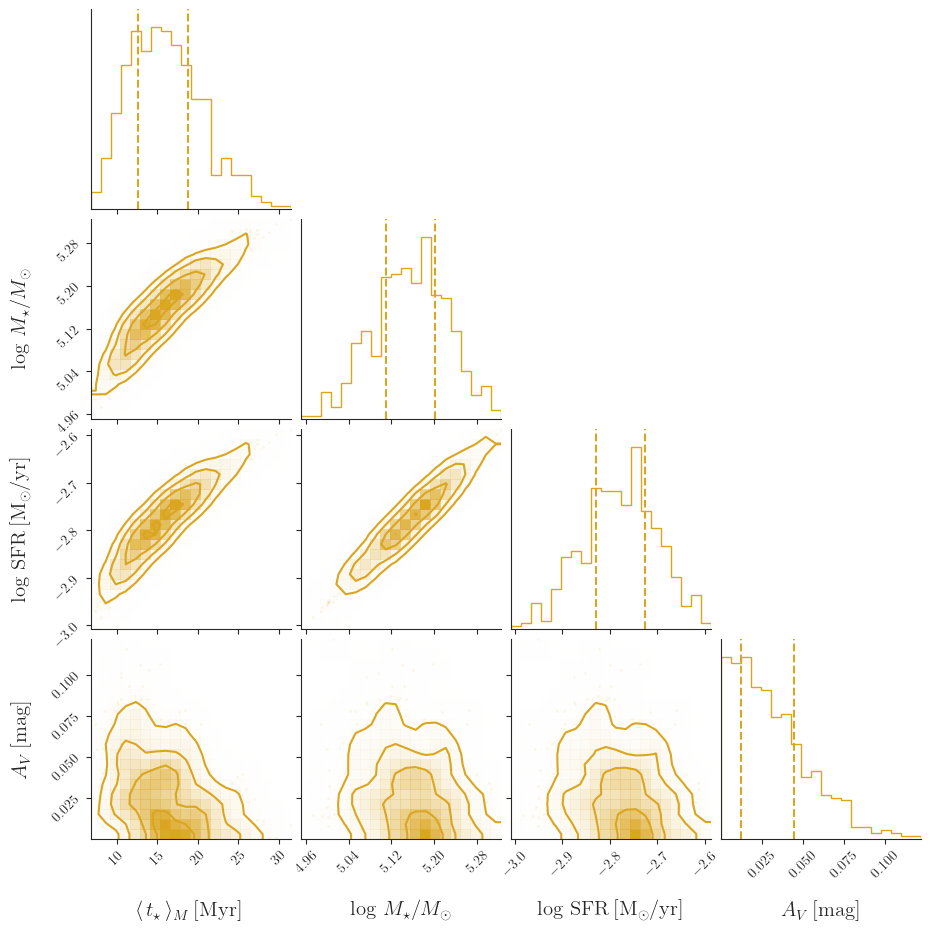

In [83]:
corner.corner(np.array([1e3*example_pdfs['mwage'][0], example_pdfs['stellar_mass'][0], 
                        example_pdfs['sfr'][0], example_pdfs['Av'][0]]).transpose(), 
                        smooth=1, color='goldenrod', quantiles=[0.25, 0.75], label_kwargs={'fontsize': 15},
                        labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                  r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'])
sns.despine()

plt.savefig('Plots/halpha_corner.png', dpi=300)

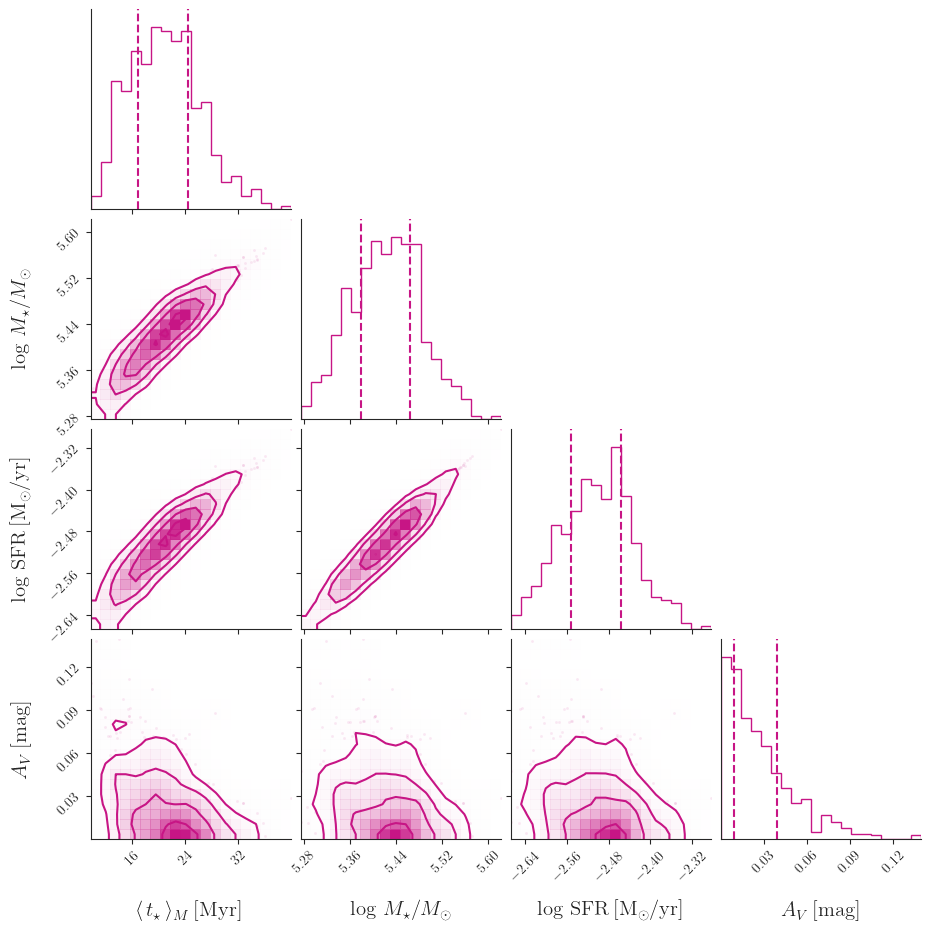

In [82]:
corner.corner(np.array([1e3*example_pdfs['mwage'][1], example_pdfs['stellar_mass'][1], 
                        example_pdfs['sfr'][1], example_pdfs['Av'][1]]).transpose(), 
                        smooth=1, color='mediumvioletred', quantiles=[0.25, 0.75], label_kwargs={'fontsize': 15},
                        labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                  r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'])
sns.despine()

plt.savefig('Plots/uv_corner.png', dpi=300)

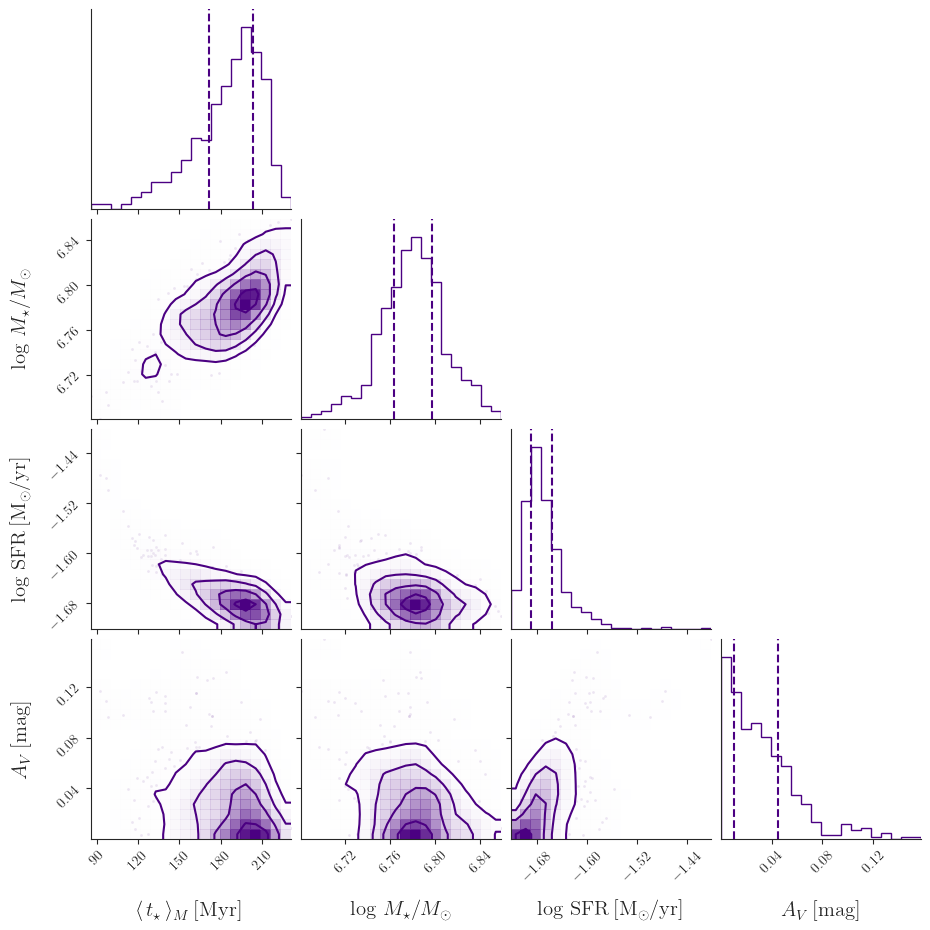

In [81]:
corner.corner(np.array([1e3*example_pdfs['mwage'][2], example_pdfs['stellar_mass'][2], 
                        example_pdfs['sfr'][2], example_pdfs['Av'][2]]).transpose(), 
                        smooth=1, color='indigo', quantiles=[0.25, 0.75], label_kwargs={'fontsize': 15},
                        labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                  r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'])
sns.despine()

plt.savefig('Plots/complex_corner.png', dpi=300)

C:\Users\ariel\AppData\Local\Temp\ipykernel_11876\3946078045.py:5: RuntimeWarning: divide by zero encountered in log10
  np.log10(halpha_full_pdf['sfr'])[halpha_clump_index], halpha_full_pdf['Av'][halpha_clump_index]]).transpose(),


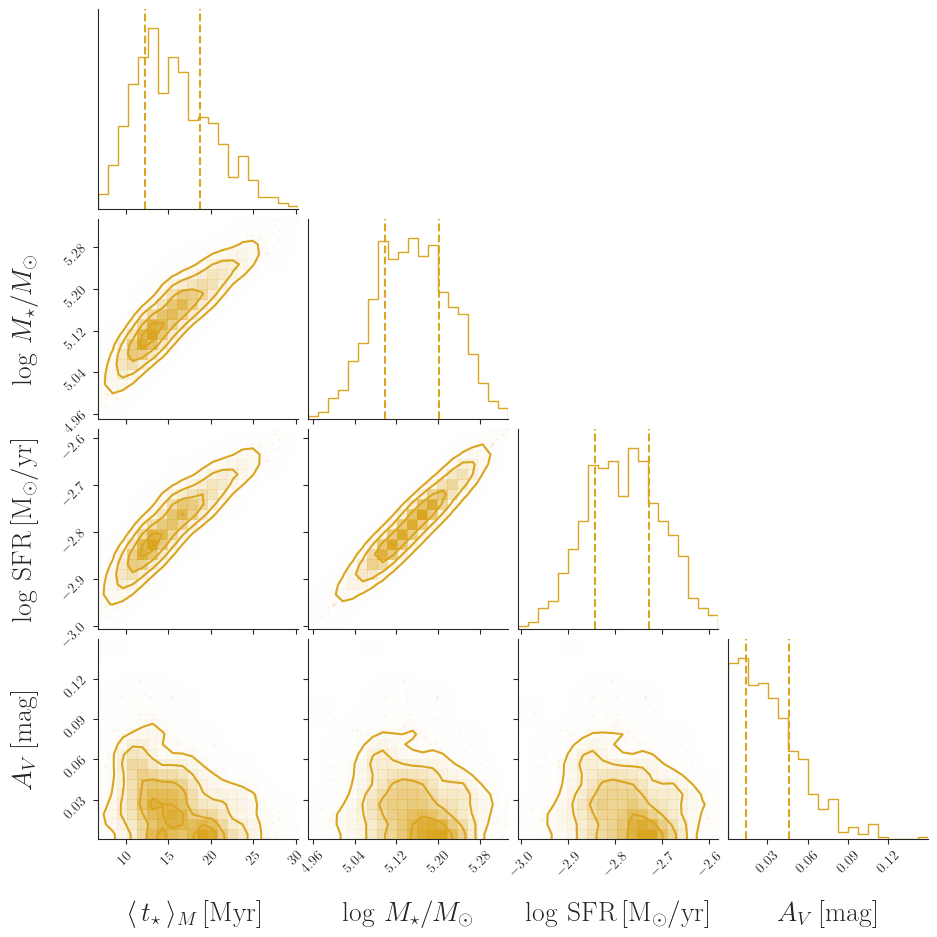

In [62]:
# From the Halpha PDF table:

halpha_clump_index = np.argwhere(halpha_full_pdf['clump_id'] == 'JO201_A40_halpha')[0][0]
corner.corner(np.array([1e3*halpha_full_pdf['mwage'][halpha_clump_index], halpha_full_pdf['stellar_mass'][halpha_clump_index], 
                        np.log10(halpha_full_pdf['sfr'])[halpha_clump_index], halpha_full_pdf['Av'][halpha_clump_index]]).transpose(), 
                        smooth=1, color='goldenrod', quantiles=[0.25, 0.75], label_kwargs={'fontsize': 20},
                        labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                  r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'])
sns.despine()

Signature:
corner.corner(
    data,
    bins=20,
    *,
    range=None,
    axes_scale='linear',
    weights=None,
    color=None,
    hist_bin_factor=1,
    smooth=None,
    smooth1d=None,
    labels=None,
    label_kwargs=None,
    titles=None,
    show_titles=False,
    title_quantiles=None,
    title_fmt='.2f',
    title_kwargs=None,
    truths=None,
    truth_color='#4682b4',
    scale_hist=False,
    quantiles=None,
    verbose=False,
    fig=None,
    max_n_ticks=5,
    top_ticks=False,
    use_math_text=False,
    reverse=False,
    labelpad=0.0,
    hist_kwargs=None,
    group='posterior',
    var_names=None,
    filter_vars=None,
    coords=None,
    divergences=False,
    divergences_kwargs=None,
    labeller=None,
    **hist2d_kwargs,
)
Source:   
def corner(
    data,
    bins=20,
    *,
    # Original corner parameters
    range=None,
    axes_scale="linear",
    weights=None,
    color=None,
    hist_bin_factor=1,
    smooth=None,
    smooth1d=None,
    labels=None,
    

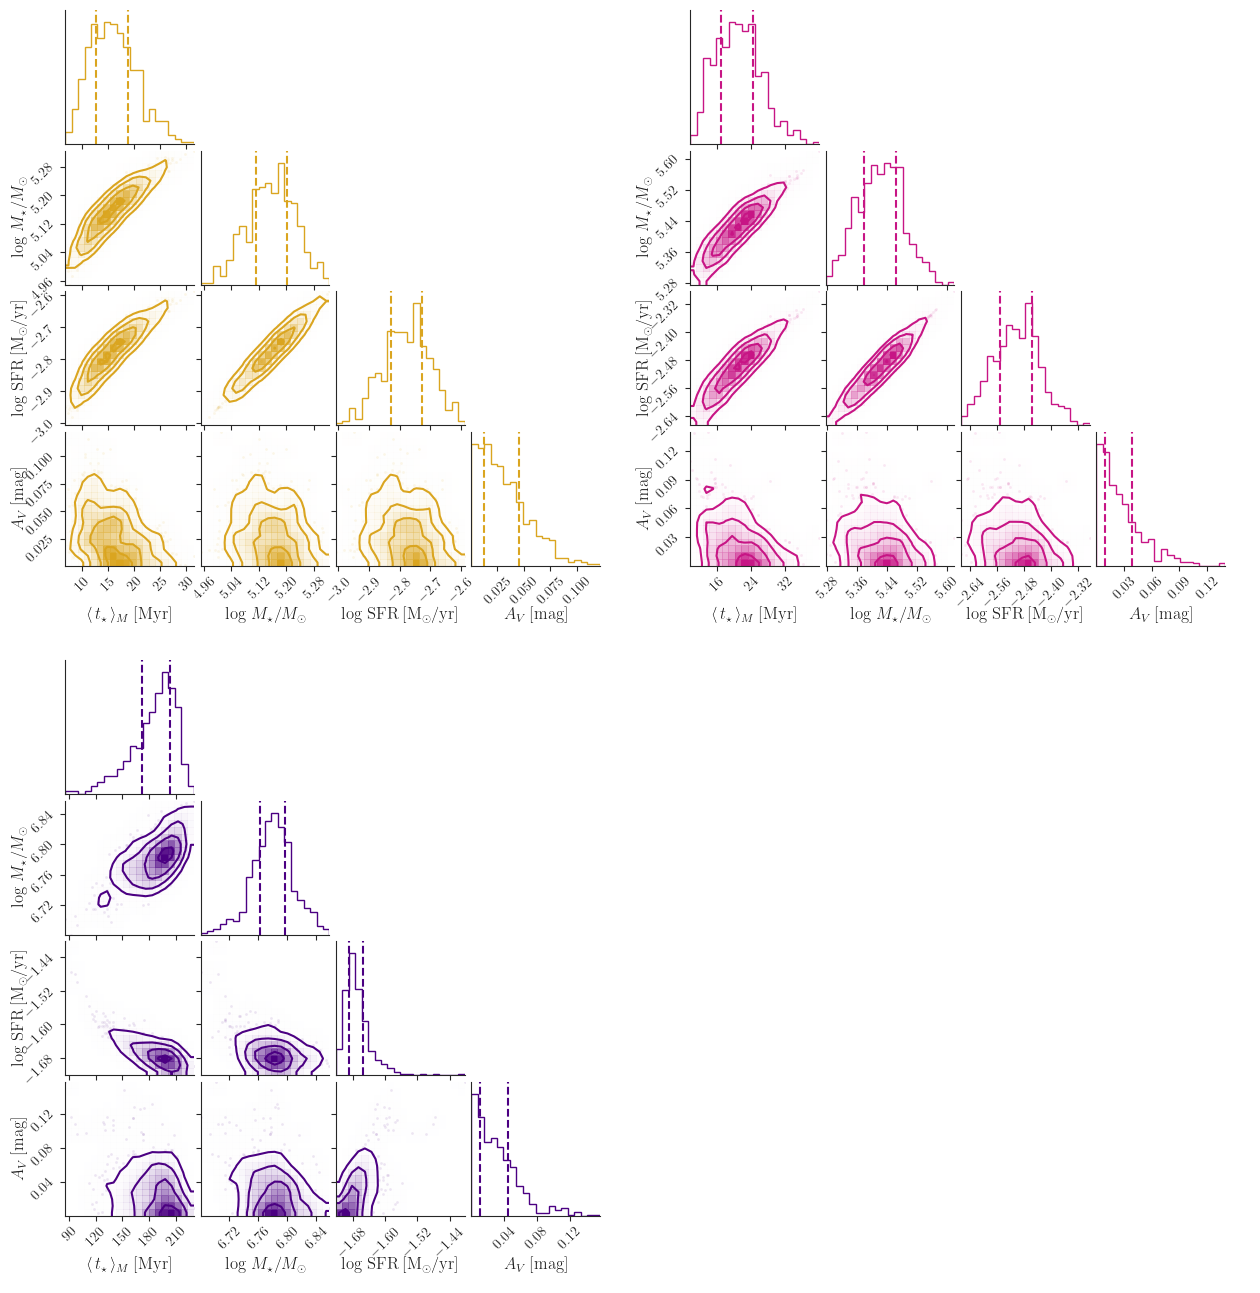

In [45]:
fig = plt.figure(figsize=(12.5, 13))
subfigs = fig.subfigures(2, 2, wspace=0, hspace=0)

fig.tight_layout()

color_list = ['goldenrod', 'mediumvioletred', 'indigo']

for i in range(3):
    corner.corner(np.array([1e3*example_pdfs['mwage'][i], example_pdfs['stellar_mass'][i], 
                            example_pdfs['sfr'][i], example_pdfs['Av'][i]]).transpose(), 
                            smooth=1, color=color_list[i], quantiles=[0.25, 0.75], label_kwargs={'fontsize': 12},
                            labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                    r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'],
                            fig=subfigs.ravel()[i])
    subfigs.ravel()[i].subplots_adjust(hspace=0.05, wspace=0.05)
    sns.despine()

plt.savefig('Plots/all_corner.png', dpi=300)

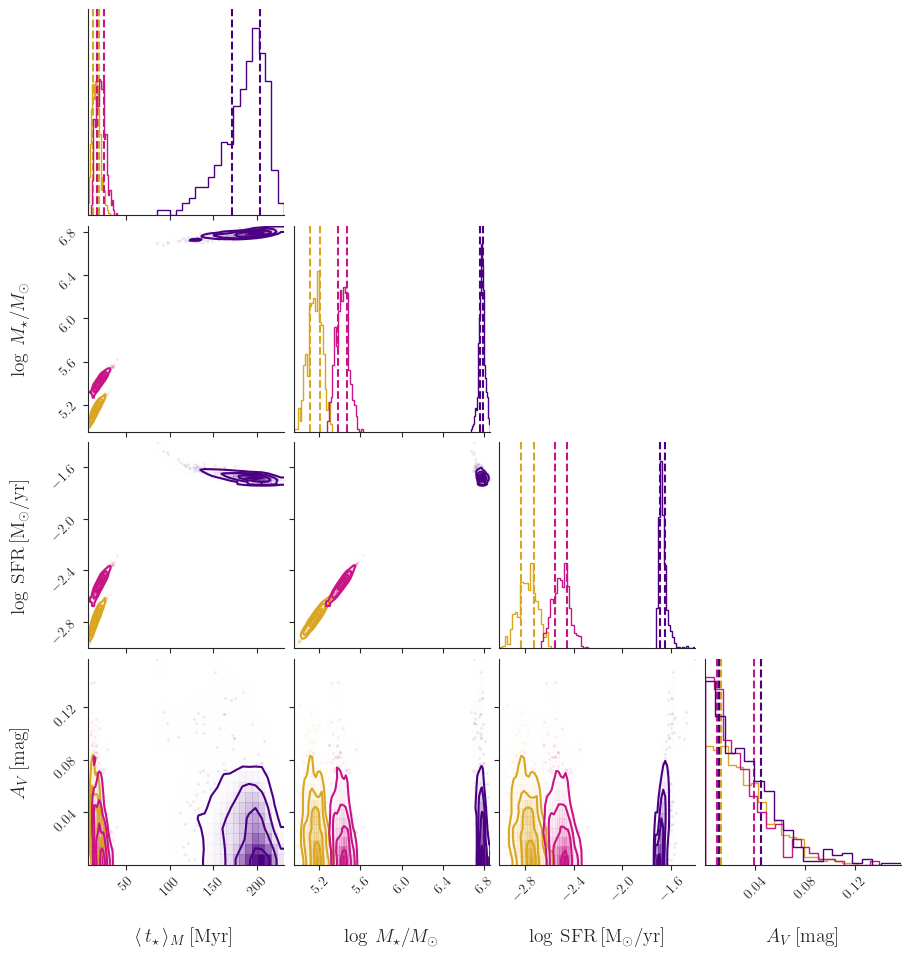

In [28]:
color_list = ['goldenrod', 'mediumvioletred', 'indigo']

fig = plt.figure(figsize=(9.5, 10))

for i in range(3):
    corner.corner(np.array([1e3*example_pdfs['mwage'][i], example_pdfs['stellar_mass'][i], 
                            example_pdfs['sfr'][i], example_pdfs['Av'][i]]).transpose(), 
                            smooth=1, color=color_list[i], quantiles=[0.25, 0.75], label_kwargs={'fontsize': 14},
                            labels = [r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', r'$\log\,M_\star/M_\odot$',
                                    r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', r'$A_V\,\mathrm{[mag]}$'], fig=fig)
    sns.despine()

In [59]:

np.median(1e3*halpha_ssps['age'])


6.32604871689807

(array([167.,  62.,  92.,  41.,   3.,   1.,   0.,   2.,   2.,   4.,   2.,
          0.,   1.,   3.,   3.,   3.,   0.,   3.,   1.,   0.,   1.,   2.,
          1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   1.,   1.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.]),
 array([  1.        ,   3.90742701,   6.81485403,   9.72228104,
         12.62970806,  15.53713507,  18.44456208,  21.3519891 ,
         24.25941611,  27.16684313,  30.07427014,  32.98169715,
         35.88912417,  38.79655118,  41.7039782 ,  44.61140521,
         47.51883222,  50.42625924,  53.33368625,  56.24111327

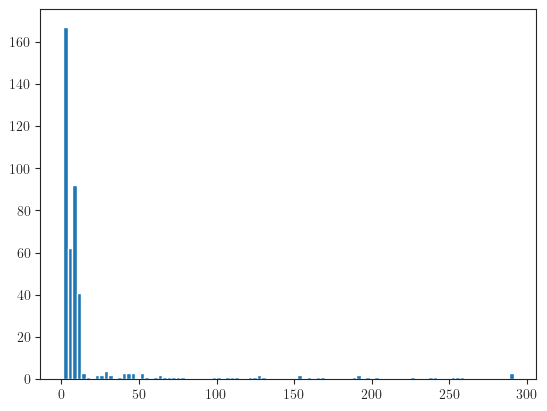

In [58]:
plt.hist(1e3*halpha_ssps['mwage'], bins=100)